<a href="https://colab.research.google.com/github/ThaoHuyen1856/CNN/blob/main/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
# Tải dữ liệu
!kaggle datasets download -d zdatasetcom/currency-of-viet-nam
!unzip currency-of-viet-nam.zip -d currency-of-viet-nam

Dataset URL: https://www.kaggle.com/datasets/zdatasetcom/currency-of-viet-nam
License(s): unknown
Archive:  currency-of-viet-nam.zip
  inflating: currency-of-viet-nam/data/data_folder/100/1633160670437.jpg  
  inflating: currency-of-viet-nam/data/data_folder/100/1633160685274.jpg  
  inflating: currency-of-viet-nam/data/data_folder/100/1633160696486.jpg  
  inflating: currency-of-viet-nam/data/data_folder/100/1633160708558.jpg  
  inflating: currency-of-viet-nam/data/data_folder/100/1633160720911.jpg  
  inflating: currency-of-viet-nam/data/data_folder/100/1633160725434.jpg  
  inflating: currency-of-viet-nam/data/data_folder/100/1633160728845.jpg  
  inflating: currency-of-viet-nam/data/data_folder/100/1633160739919.jpg  
  inflating: currency-of-viet-nam/data/data_folder/100/1633160744467.jpg  
  inflating: currency-of-viet-nam/data/data_folder/100/1633160746902.jpg  
  inflating: currency-of-viet-nam/data/data_folder/100/1633160762185.jpg  
  inflating: currency-of-viet-nam/data/dat

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Đường dẫn dữ liệu - Kiểm tra lại đường dẫn này cho chính xác
data_dir = "/content/currency-of-viet-nam/data/data_folder"  # Thay đổi đường dẫn nếu cần
img_size = (64, 64)
x, y = [], []

# Lọc các thư mục con thực sự có chứa ảnh (loại bỏ thư mục rác)
labels = sorted([folder for folder in os.listdir(data_dir)
                 if os.path.isdir(os.path.join(data_dir, folder)) and folder.isdigit()])

print(" Các lớp phát hiện được:", labels)

for label_index, folder in enumerate(labels):
    folder_path = os.path.join(data_dir, folder)
    for file_name in os.listdir(folder_path):
        if file_name.lower().endswith((".jpg", ".jpeg", ".png")):
            img_path = os.path.join(folder_path, file_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, img_size)
                x.append(img)
                y.append(label_index)

# In ra số lượng ảnh đã tải để kiểm tra
print(f" Đã tải {len(x)} ảnh.")


# Chuyển đổi thành mảng NumPy
x = np.array(x)
y = np.array(y)

# Chia tập train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Chuẩn hóa ảnh
x_train = x_train.reshape(x_train.shape[0], -1).astype("float32") / 255
x_test = x_test.reshape(x_test.shape[0], -1).astype("float32") / 255

# One-hot encoding
y_train = to_categorical(y_train, num_classes=len(labels))
y_test = to_categorical(y_test, num_classes=len(labels))

 Các lớp phát hiện được: ['100', '1000', '10000', '100000', '200', '2000', '20000', '200000', '500', '5000', '50000', '500000']
 Đã tải 304 ảnh.


In [ ]:
model= Sequential([Dense(3000, activation='relu', input_shape=(64*64*3,)),
                   Dense(12, activation='softmax')])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_test, y_test))
loss, acc = model.evaluate(x_test, y_test)
print(f"Accuracy: {acc*100:.2f}%")
model.save("/content/Untitled4.h5")

Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 955ms/step - accuracy: 0.1055 - loss: 26.0022 - val_accuracy: 0.1148 - val_loss: 15.9417
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.0783 - loss: 18.2819 - val_accuracy: 0.1639 - val_loss: 8.8251
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 823ms/step - accuracy: 0.1612 - loss: 6.5653 - val_accuracy: 0.0984 - val_loss: 3.7327
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 813ms/step - accuracy: 0.1914 - loss: 3.2305 - val_accuracy: 0.2459 - val_loss: 2.7259
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.2283 - loss: 2.4305 - val_accuracy: 0.2131 - val_loss: 2.3057
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4005 - loss: 2.0922 - val_accuracy: 0.2295 - val_loss: 2.2594
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 757ms/step - accuracy: 0.2933 - loss: 2.0635 - val_accuracy: 0.2951 - val_loss: 2.1056
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 774ms/step - accuracy: 0.4316 - loss: 1.8365 - val_accuracy: 0.2951 - val_loss: 

Accuracy: 42.62%


In [ ]:
import os
print(os.path.exists('/content/Untitled4.h5'))

True


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


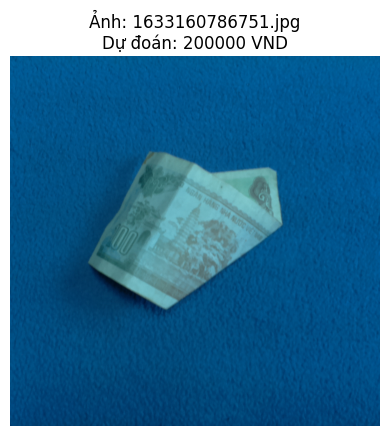

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


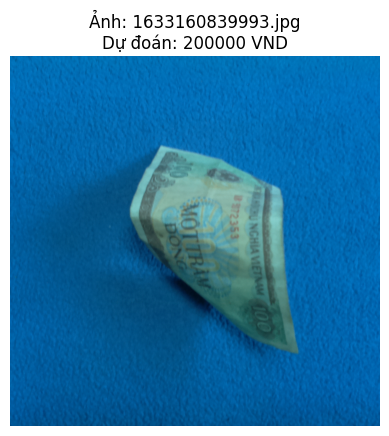

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


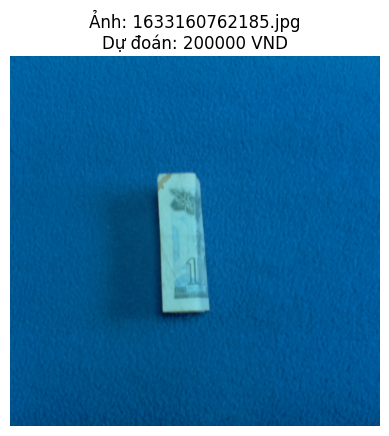

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


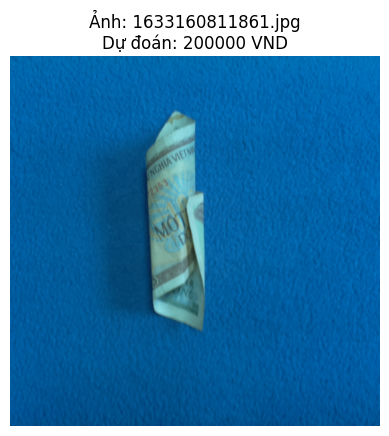

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


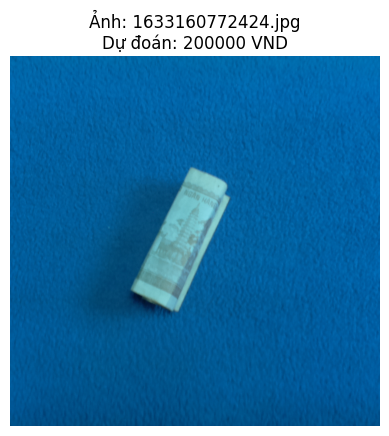

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


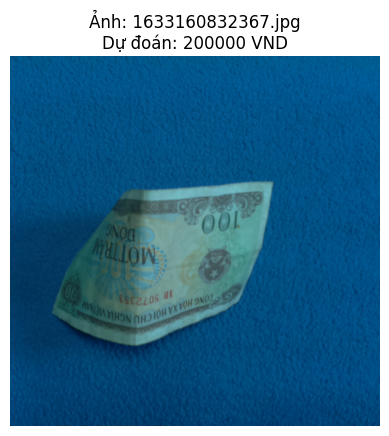

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


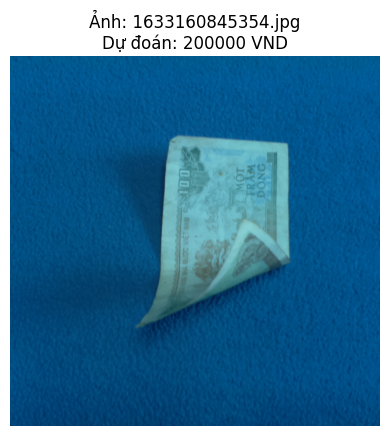

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


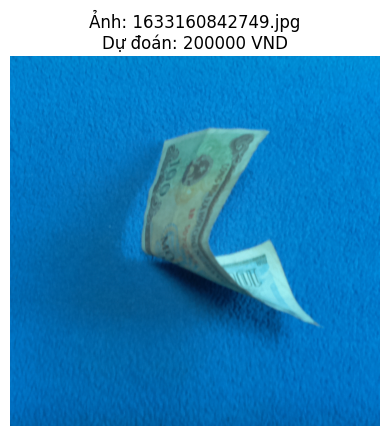

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


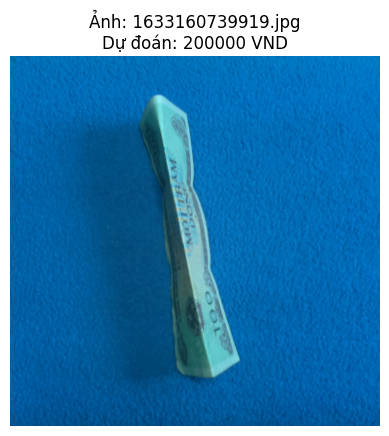

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


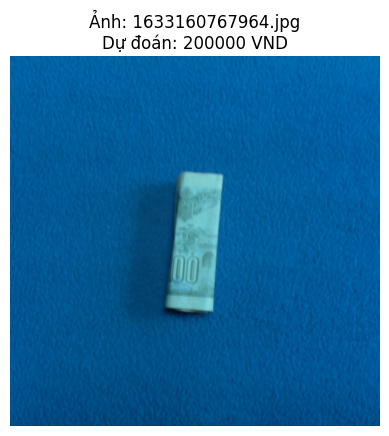

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


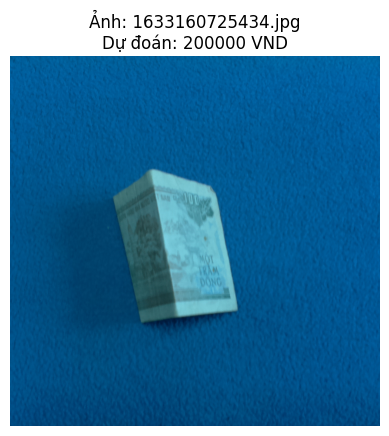

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


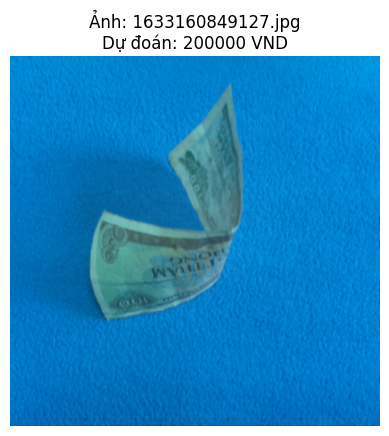

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


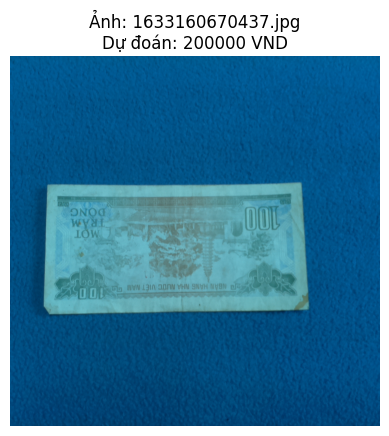

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


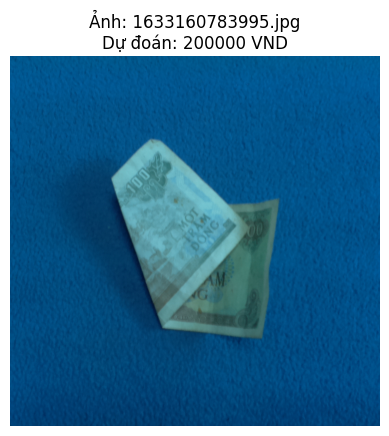

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


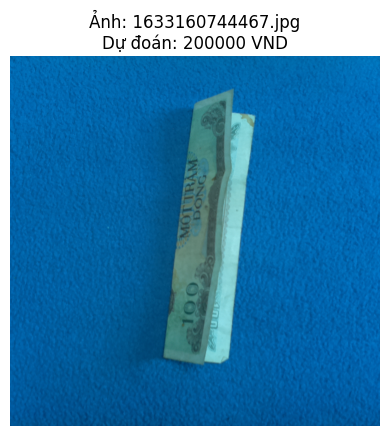

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


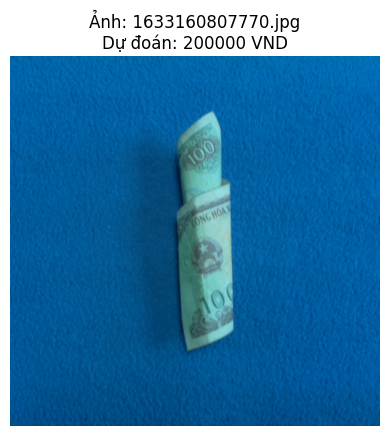

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


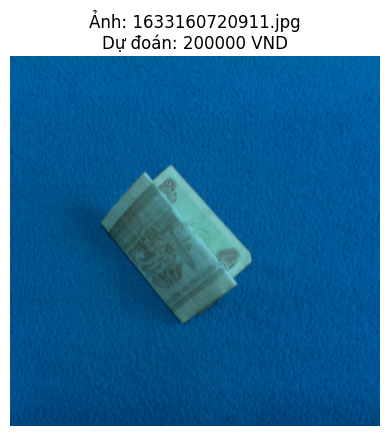

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


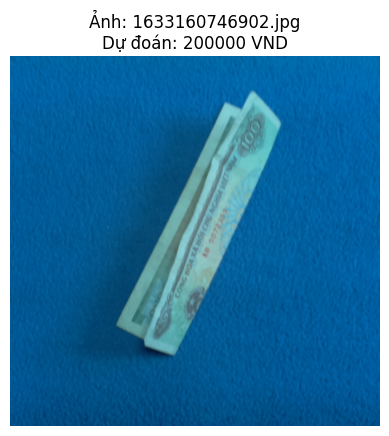

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


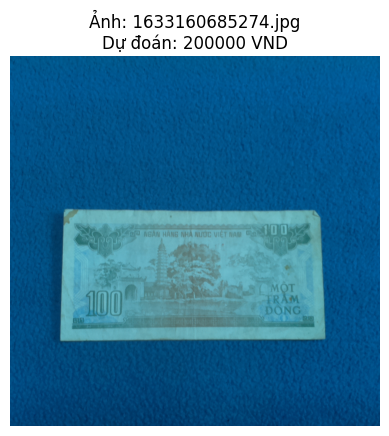

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


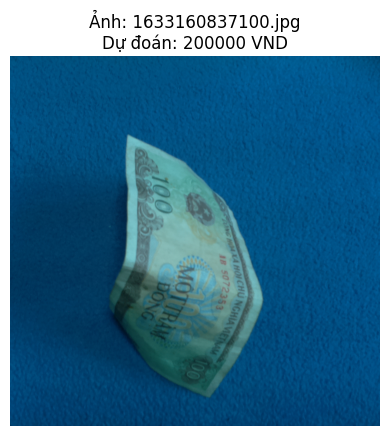

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


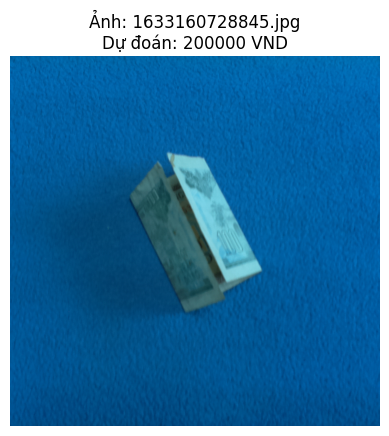

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


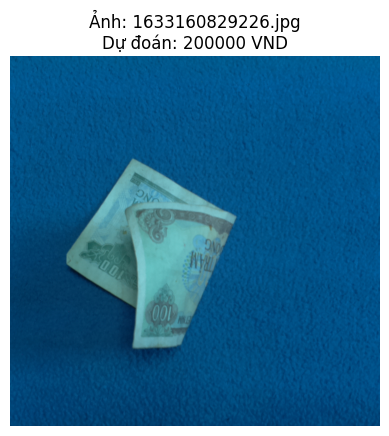

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


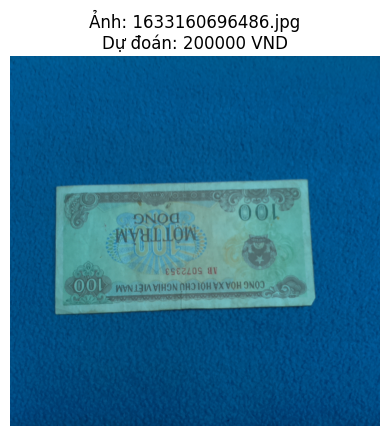

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


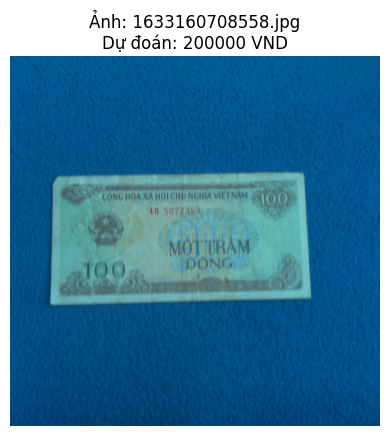

In [ ]:
from tensorflow.keras.models import load_model
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load mô hình đã huấn luyện
model = load_model("/content/Untitled4.h5")

# Đường dẫn đến thư mục chứa ảnh cần nhận diện
folder_path = "/content/currency-of-viet-nam/data/data_folder/100"

# Kích thước ảnh giống lúc huấn luyện
img_size = (64, 64)

# Danh sách các nhãn (theo thứ tự bạn đã dùng để train)
labels = ['100', '200', '500', '1000', '2000', '5000',
          '10000', '20000', '50000', '100000', '200000', '500000']

# Nhận diện và hiển thị ảnh
for file_name in os.listdir(folder_path):
    if file_name.lower().endswith((".jpg", ".jpeg", ".png")):
        img_path = os.path.join(folder_path, file_name)
        img = cv2.imread(img_path)

        if img is not None:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_resized = cv2.resize(img_rgb, img_size)
            img_input = img_resized.astype("float32") / 255
            img_input = img_input.reshape(1, 64*64*3)

            prediction = model.predict(img_input)
            predicted_label = labels[np.argmax(prediction)]

            # Hiển thị ảnh và nhãn dự đoán
            plt.imshow(img_rgb)
            plt.axis("off")
            plt.title(f"Ảnh: {file_name}\nDự đoán: {predicted_label} VND")
            plt.show()
